# Jupyter lab on Sunbird using port forwarding
An excellent manual for Classic Jupyter: https://github.com/McWilliamsCenter/slurm_jupyter

I've tailored this manual for Swansea Sunbird for both Jupyter and Jupyter lab.

What is Swansea Sunbird ? https://portal.supercomputing.wales/index.php/about-sunbird/

# Installing Jupyter lab
* Create a conda environment or load an existing one as `source activate ml`
* By default a package named `six` is missing. 

```sh
(pytorch) [s.1915438@sl2 ~]$ jupyter notebook --generate-config
Traceback (most recent call last):
  File "/apps/languages/anaconda3/bin/jupyter-notebook", line 7, in <module>
    from notebook.notebookapp import main
  File "/apps/languages/anaconda3/lib/python3.6/site-packages/notebook/__init__.py", line 25, in <module>
    from .nbextensions import install_nbextension
  File "/apps/languages/anaconda3/lib/python3.6/site-packages/notebook/nbextensions.py", line 31, in <module>
    from .config_manager import BaseJSONConfigManager
  File "/apps/languages/anaconda3/lib/python3.6/site-packages/notebook/config_manager.py", line 14, in <module>
    from six import PY3
ModuleNotFoundError: No module named 'six'
```

So, it is better to install new Jupyter lab or Jupyter as follows:
* Jupyter lab: `pip install jupyterlab`
* Jupyter: `pip install notebook`

In the root i.e. `/home/s.1915438` run this command to generate the config file and store password for secure port forwarding. Apperently this command does not work.
```sh
(ml) [s.1915438@sl2 ~]$ pwd
/home/s.1915438
(ml) [s.1915438@sl2 ~]$ jupyter-lab --generate-config
(ml) [s.1915438@sl2 ~]$ jupyter-lab password
Enter password: 
Verify password: 
Traceback (most recent call last):
  File "/home/s.1915438/.conda/envs/ml/bin/jupyter-lab", line 8, in <module>
    sys.exit(main())
  File "/home/s.1915438/.conda/envs/ml/lib/python3.9/site-packages/jupyter_server/extension/application.py", line 602, in launch_instance
    serverapp.start()
  File "/home/s.1915438/.conda/envs/ml/lib/python3.9/site-packages/jupyter_server/serverapp.py", line 2760, in start
    self.start_app()
  File "/home/s.1915438/.conda/envs/ml/lib/python3.9/site-packages/jupyter_server/serverapp.py", line 2658, in start_app
    super(ServerApp, self).start()
  File "/home/s.1915438/.conda/envs/ml/lib/python3.9/site-packages/jupyter_core/application.py", line 253, in start
    self.subapp.start()
  File "/home/s.1915438/.conda/envs/ml/lib/python3.9/site-packages/jupyter_server/serverapp.py", line 492, in start
    set_password(config_file=self.config_file)
  File "/home/s.1915438/.conda/envs/ml/lib/python3.9/site-packages/jupyter_server/auth/security.py", line 172, in set_password
    hashed_password = passwd(password)
  File "/home/s.1915438/.conda/envs/ml/lib/python3.9/site-packages/jupyter_server/auth/security.py", line 63, in passwd
    import argon2
  File "/home/s.1915438/.conda/envs/ml/lib/python3.9/site-packages/argon2/__init__.py", line 7, in <module>
    from . import exceptions, low_level, profiles
  File "/home/s.1915438/.conda/envs/ml/lib/python3.9/site-packages/argon2/low_level.py", line 15, in <module>
    from _argon2_cffi_bindings import ffi, lib
  File "/home/s.1915438/.conda/envs/ml/lib/python3.9/site-packages/_argon2_cffi_bindings/__init__.py", line 3, in <module>
    from ._ffi import ffi, lib
ImportError: libffi.so.7: cannot open shared object file: No such file or directory
```

# Tinkering configuration file
So, we will go without the password. But there is a Jupyter server token for security also the public IP is also hidden in ssh-tunnel.

Now head on to `/lustrehome/home/s.1915438/.jupyter` and open the file, un-comment and change the following lines. 
* Jupyter lab: 
    * `c.LabApp.open_browser = False`
    * `c.ServerApp.port = 8888`
* Jupyter: 
    * `c.NotebookApp.open_browser = False`
    * `c.NotebookApp.port = 8888` # (You can set this to any four-digit integer)
    
Obviously, we don't want to the Notebook to open in the browser as there is no browser on Sunbird. Lol.

Also, we want to set a specific port on server (Sunbird) for port forwarding.

# Port forwarding
This command is used to run commands on the server (Sunbird) while sshing.

`ssh -L <port>:localhost:<port> -t <user>@<server> "jupyter notebook"`

where `<port>` is the port you set earlier, `<user>` is your cluster user id, and `<server>` is the address of the login server. The `-L` flag tells ssh to tunnel the `localhost:<port>` of the remote server to that of your local machine. The `-t` flag opens up the connection as an interactive session, allowing you to pass `SIGINT` (Ctrl-C) to end the jupyter notebook before killing the ssh connection. To open your jupyter notebook within a specific conda environment (e.g. `<env>`), replace the command in quotations with `source activate <env>; jupyter notebook`.

# Running Jupyter lab on login node
Here is out turn to become creative with the command.
```sh
(base) hell@Dell-Precision-T1600:~/Desktop/repos/Sunbird/Jupyter_lab_port_forwarding$ ssh -L 8888:localhost:8888 -t s.1915438@sunbird.swansea.ac.uk "module load anaconda/3;source activate ml;jupyter-lab"
```

Here, `8888` on left, in green colour is my server (Sunbird) port and `8888` on the right is my local port and `-L` tunnel both the ports.

`-t` opens an interactive session in which we can any command that falls inside those inverted commas `""`.

Now, we can run our Jupyter lab as follows:
* Load Anaconda: `module load anaconda/3` the module name might change time to time. Check the module name using `module avail`.
* Activate the conda environment where you installed the Jupyter Lab. In my case it was `ml` conda environment. So, I would type `source activate ml`.
    * `source activate base` and then `conda activate ml` is equivalent to above command.
* Now run `jupyter-lab` as you were using `anaconda prompt` in Windows. 

All these things can be passed to ssh as `"module load anaconda/3;source activate ml;jupyter-lab"`.

As you run ssh command you will see Jupyter lab is starting.
```sh
(base) hell@Dell-Precision-T1600:~/Desktop/repos/Sunbird/Jupyter_lab_port_forwarding$ ssh -L 8888:localhost:8888 -t s.1915438@sunbird.swansea.ac.uk "module load anaconda/3;source activate ml;jupyter-lab"
[I 2022-03-19 22:39:59.593 ServerApp] jupyterlab | extension was successfully linked.
[I 2022-03-19 22:39:59.602 ServerApp] nbclassic | extension was successfully linked.
[I 2022-03-19 22:40:00.377 ServerApp] notebook_shim | extension was successfully linked.
[I 2022-03-19 22:40:00.432 ServerApp] notebook_shim | extension was successfully loaded.
[I 2022-03-19 22:40:00.434 LabApp] JupyterLab extension loaded from /home/s.1915438/.conda/envs/ml/lib/python3.9/site-packages/jupyterlab
[I 2022-03-19 22:40:00.434 LabApp] JupyterLab application directory is /lustrehome/home/s.1915438/.conda/envs/ml/share/jupyter/lab
[I 2022-03-19 22:40:00.438 ServerApp] jupyterlab | extension was successfully loaded.
[I 2022-03-19 22:40:00.452 ServerApp] nbclassic | extension was successfully loaded.
[I 2022-03-19 22:40:00.452 ServerApp] Serving notebooks from local directory: /lustrehome/home/s.1915438
[I 2022-03-19 22:40:00.453 ServerApp] Jupyter Server 1.15.6 is running at:
[I 2022-03-19 22:40:00.453 ServerApp] http://localhost:8888/lab?token=d9d5dd555ef63d682ec2b68232f493a4818db4bb71f1f6a1
[I 2022-03-19 22:40:00.453 ServerApp]  or http://127.0.0.1:8888/lab?token=d9d5dd555ef63d682ec2b68232f493a4818db4bb71f1f6a1
[I 2022-03-19 22:40:00.453 ServerApp] Use Control-C to stop this server and shut down all kernels (twice to skip confirmation).
[C 2022-03-19 22:40:00.459 ServerApp] 
    
    To access the server, open this file in a browser:
        file:///lustrehome/home/s.1915438/.local/share/jupyter/runtime/jpserver-89059-open.html
    Or copy and paste one of these URLs:
        http://localhost:8888/lab?token=d9d5dd555ef63d682ec2b68232f493a4818db4bb71f1f6a1
     or http://127.0.0.1:8888/lab?token=d9d5dd555ef63d682ec2b68232f493a4818db4bb71f1f6a1
[W 2022-03-19 22:40:30.098 LabApp] Could not determine jupyterlab build status without nodejs
[I 2022-03-19 22:42:43.725 ServerApp] New terminal with automatic name: 1
TermSocket.open: 1
TermSocket.open: Opened 1
[I 2022-03-19 22:43:22.523 ServerApp] Writing notebook-signing key to /lustrehome/home/s.1915438/.local/share/jupyter/notebook_secret
[W 2022-03-19 22:43:22.526 ServerApp] Notebook ipynb_try/2D heat conduction.ipynb is not trusted
[I 2022-03-19 22:43:24.066 ServerApp] Kernel started: 45842dc9-891f-4ce4-94d1-12e6aa528f09

```

Copy and paste the one the link the `localhost` one or the `127.0.0.1:8888` one in your favourite browser. Bingo. It is working.

A screenshot:

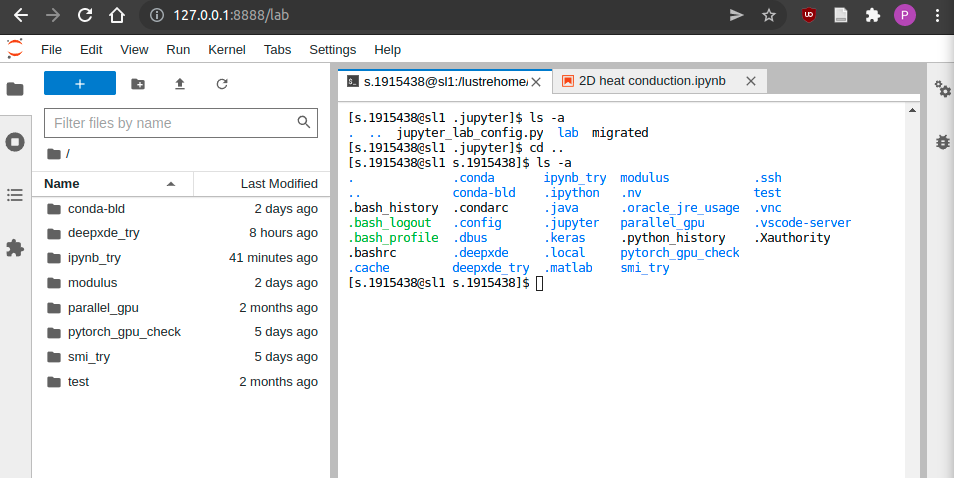

To close the session. Go to File -> Shut Down.

```sh
[I 2022-03-19 23:33:38.361 ServerApp] Terminal 1 closed
Websocket closed
[I 2022-03-19 23:33:39.321 ServerApp] Shutting down on /api/shutdown request.
[I 2022-03-19 23:33:39.322 ServerApp] Shutting down 3 extensions
[I 2022-03-19 23:33:39.322 ServerApp] Shutting down 0 kernels
[I 2022-03-19 23:33:39.322 ServerApp] Shutting down 0 terminals
[I 2022-03-19 23:47:36.316 ServerApp] Shutting down 0 terminals
Connection to sunbird.swansea.ac.uk closed.
```

The Sunbird has `htop` preinstalled so you can see how much memory are you using. Also, you can double check if the Jupyter Lab server is still running or not.

# Wrapping ssh command in Bash file
Instead of typing this `ssh -L 8888:localhost:8888 -t s.1915438@sunbird.swansea.ac.uk "module load anaconda/3;source activate ml;jupyter-lab"` every single time, we can write a bash script.

Just create a new text file using `gedit` or `nano` and paste the above command.

Now where do you create this bash file. On Sunbird? Obviously not. If you have this question in your mind `rm -rf /` your PC.